In [24]:
import requests
import pandas as pd
import hashlib
import json
import random

In [205]:
#ACQUISTION

# Importing data from API

list_of_characters = []
offset = 0

for i in range(15):
    url = f'http://gateway.marvel.com/v1/public/characters'
    private_key = "9569164e98f5f2b3a84ce161f501b6e7cda35997"
    public_key = "f4afbc73aea9aa4703bf0ba8e236f72c"
    limit = 100

    ts = "1580473503"
    h =  "80291752e65a9c7f636ebd0752a64b5f"

    p = {
      "apikey": public_key ,
      "ts": ts,
      "hash": h,
      "limit" : limit,
      "offset" : offset
    }
    offset += limit
    
    response = requests.get(url, params=p)
    result = response.json()
    
    list_of_characters.append(result)

In [206]:
# Creation of dataframe df_marvel_api from API data

column_names = []
column_ids = []
for i in range(len(list_of_characters)):
    for character in list_of_characters[i]['data']['results']:
        column_names.append(character["name"])
        column_ids.append(character["id"])
df_marvel_api = pd.DataFrame({'Names': column_names, 'Ids': column_ids})
df_marvel_api

,Names,Ids
0,3-D Man,1011334
1,A-Bomb (HAS),1017100
2,A.I.M.,1009144
3,Aaron Stack,1010699
4,Abomination (Emil Blonsky),1009146
...,...,...
1488,Zemo,1010780
1489,Zodiak,1011127
1490,Zombie (Simon Garth),1009741
1491,Zuras,1011183


In [207]:
df_marvel_api = pd.DataFrame(column_names, columns =['Name']) 
df_marvel_api 

,Name
0,3-D Man
1,A-Bomb (HAS)
2,A.I.M.
3,Aaron Stack
4,Abomination (Emil Blonsky)
...,...
1488,Zemo
1489,Zodiak
1490,Zombie (Simon Garth)
1491,Zuras


In [28]:
column_ids = []
for i in range(len(list_of_characters)):
    for character in list_of_characters[i]['data']['results']:
        column_ids.append(character["id"])
        
column_ids

[1011334,
 1017100,
 1009144,
 1010699,
 1009146,
 1016823,
 1009148,
 1009149,
 1010903,
 1011266,
 1010354,
 1010846,
 1011297,
 1011031,
 1009150,
 1011198,
 1011175,
 1011136,
 1011176,
 1010870,
 1011194,
 1011170,
 1009240,
 1011120,
 1010836,
 1010755,
 1011214,
 1009497,
 1014990,
 1009435,
 1010370,
 1011324,
 1011164,
 1011227,
 1009567,
 1011382,
 1011361,
 1009151,
 1010672,
 1010673,
 1010905,
 1009152,
 1016824,
 1011396,
 1011338,
 1009153,
 1017574,
 1010674,
 1009346,
 1009154,
 1011301,
 1010802,
 1010801,
 1011208,
 1009156,
 1011253,
 1010866,
 1010773,
 1017438,
 1009158,
 1010686,
 1009159,
 1009160,
 1010784,
 1011275,
 1011012,
 1011298,
 1010827,
 1009740,
 1010748,
 1009161,
 1010718,
 1009162,
 1010835,
 1010336,
 1009163,
 1009164,
 1009165,
 1015239,
 1011766,
 1009168,
 1009596,
 1009169,
 1009170,
 1010906,
 1011137,
 1011354,
 1009550,
 1009171,
 1009172,
 1009173,
 1009174,
 1009175,
 1010909,
 1010908,
 1009176,
 1009177,
 1009178,
 1009179,
 1009329,


In [29]:
df_marvel_api["ID"] = column_ids
df_marvel_api 

,Name,ID
0,3-D Man,1011334
1,A-Bomb (HAS),1017100
2,A.I.M.,1009144
3,Aaron Stack,1010699
4,Abomination (Emil Blonsky),1009146
...,...,...
1488,Zemo,1010780
1489,Zodiak,1011127
1490,Zombie (Simon Garth),1009741
1491,Zuras,1011183


In [208]:
#exporting df into csv
df_marvel_api.to_csv("marvel_characters.csv")



In [33]:
# WRANGLING

cleaned_ids = df_marvel["ID"]
df_cleaned_ids = pd.DataFrame(cleaned_ids)
df_cleaned_ids

,ID
0,1011334
1,1017100
2,1009144
3,1010699
4,1009146
...,...
1488,1010780
1489,1011127
1490,1009741
1491,1011183


In [34]:
cleaned_names = df_marvel["Name"].apply(lambda x: x.split("(")[0].strip() )

# We eliminated the extension of the name to avoid having repeted characters (e.g. Wolverine, Wolverin (Ultimate), Wolwerin (Age of Dragon))
df_cleaned_names = pd.DataFrame(cleaned_names)
df_cleaned_names

,Name
0,3-D Man
1,A-Bomb
2,A.I.M.
3,Aaron Stack
4,Abomination
...,...
1488,Zemo
1489,Zodiak
1490,Zombie
1491,Zuras


In [149]:
df_cleaned_1 = df_cleaned_names.merge(df_cleaned_ids, left_index=True, right_index=True)
df_cleaned_1

#we merged both column clean name with id to create match (new dataframe)

,Name,ID
0,3-D Man,1011334
1,A-Bomb,1017100
2,A.I.M.,1009144
3,Aaron Stack,1010699
4,Abomination,1009146
...,...,...
1488,Zemo,1010780
1489,Zodiak,1011127
1490,Zombie,1009741
1491,Zuras,1011183


In [150]:
df_cleaned_2 = df_cleaned_1.drop_duplicates("Name")
df_cleaned_2 

# we eliminated duplicate value (as before, we removed the extension)

,Name,ID
0,3-D Man,1011334
1,A-Bomb,1017100
2,A.I.M.,1009144
3,Aaron Stack,1010699
4,Abomination,1009146
...,...,...
1488,Zemo,1010780
1489,Zodiak,1011127
1490,Zombie,1009741
1491,Zuras,1011183


In [151]:
Marvel_temp = df_cleaned_2.merge(marvel_stats, on = "Name")

In [152]:
Marvel_DF = Marvel_temp[Marvel_temp["Total"] > 5] 
Marvel_DF

""""We noticed that some characters add value = 1 on all attributes (tot=5). 
We treated them as typos so we deleted the characters from dataframe"""

'"We noticed that some characters add value = 1 on all attributes (tot=5). \nWe treated them as typos so we deleted the characters from dataframe'

In [153]:
list_of_columns = list(Marvel_FD.columns)
list_of_columns = list_of_columns[3:]

In [244]:
# Importing data from CSV (Marvel_charcters_stats)

marvel_stats = pd.read_csv('../data/charcters_stats.csv')
marvel_stats

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [245]:
# Importing data from CSV (Marvel_characters_info)

Marvel_characters_info = pd.read_csv('../data/marvel_characters_info.csv')
Marvel_characters_info

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
730,730,Ymir,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
731,731,Yoda,good,Male,brown,Yoda's species,White,George Lucas,green,66.0,17.0
732,732,Zatanna,good,Female,blue,Human,Black,DC Comics,-,170.0,57.0


In [251]:
#WRANGLING.
#C1: Keeping only marvel
Marvel_characters_info_CL1  = Marvel_characters_info[Marvel_characters_info["Publisher"] == "Marvel Comics"]
#C2: TAking off marvel column
Marvel_characters_info_CL2 = Marvel_characters_info_CL1.drop(columns = ["Publisher"])

In [253]:
#*** With this test we can see that skin color is empty for 353/388 values. we therefore delete it.

test = Marvel_characters_info_CL1[Marvel_characters_info_CL1["SkinColor"] == "-"]
test 

#C3:TAking off skincolor column ***
Marvel_characters_info_CL3 = Marvel_characters_info_CL2.drop(columns = ["SkinColor"])

In [248]:
#Merging dataframe with final df

Marvel_temp = Marvel_DF.merge(Marvel_characters_info_CL3, on = "Name")

In [254]:
Marvel_temp

,Name,ID_x,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID_y,Alignment_y,Gender,EyeColor,Race,HairColor,Height,Weight
0,A-Bomb,1017100,good,38,100,17,80,17,64,316,0,good,Male,yellow,Human,No Hair,203.0,441.0
1,Abomination,1009146,bad,63,80,53,90,55,95,436,3,bad,Male,green,Human / Radiation,No Hair,203.0,441.0
2,Agent Zero,1009150,good,75,28,38,80,72,95,388,10,good,Male,-,-,-,191.0,104.0
3,Air-Walker,1011136,bad,50,85,100,85,100,40,460,11,bad,Male,blue,-,White,188.0,108.0
4,Angel,1011396,good,63,13,46,64,17,42,245,22,good,Male,blue,-,Blond,183.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Wolverine,1009718,good,55,32,38,100,44,100,369,719,good,Male,blue,Mutant,Black,160.0,135.0
199,Wonder Man,1009719,good,75,100,53,90,64,64,446,721,good,Male,red,-,Black,188.0,171.0
200,X-23,1009722,good,75,24,35,90,27,85,336,725,good,Female,green,Mutant / Clone,Black,155.0,50.0
201,X-Man,1009725,good,88,53,53,95,92,84,465,726,good,Male,blue,-,Brown,175.0,61.0


In [292]:
#Continue cleaning on final table (repeted columns)

#C4: Taking off IDs (ID_y) , Alignment (repeted) and "Eyecolor", "Race" (useless)
Marvel_characters_info_CL4 = Marvel_temp.drop(columns = ["ID_y","Alignment_y","EyeColor", "Race", "HairColor"])

In [293]:
#C4: Renaming Columns
Marvel_characters_info_CL5 = Marvel_characters_info_CL4.rename(columns={"ID_x": "ID", "Alignment_x": "Alignment"})
Marvel_characters_info_CL5

,Name,ID,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Gender,Height,Weight
0,A-Bomb,1017100,good,38,100,17,80,17,64,316,Male,203.0,441.0
1,Abomination,1009146,bad,63,80,53,90,55,95,436,Male,203.0,441.0
2,Agent Zero,1009150,good,75,28,38,80,72,95,388,Male,191.0,104.0
3,Air-Walker,1011136,bad,50,85,100,85,100,40,460,Male,188.0,108.0
4,Angel,1011396,good,63,13,46,64,17,42,245,Male,183.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Wolverine,1009718,good,55,32,38,100,44,100,369,Male,160.0,135.0
199,Wonder Man,1009719,good,75,100,53,90,64,64,446,Male,188.0,171.0
200,X-23,1009722,good,75,24,35,90,27,85,336,Female,155.0,50.0
201,X-Man,1009725,good,88,53,53,95,92,84,465,Male,175.0,61.0


In [316]:
# ANALYSIS:CORRELATION

#Converting categorical values to binomial

Marvel_characters_info_BI = Marvel_characters_info_CL5.replace({"Alignment": {"good": 0 , "bad": 1, "neutral" : 0 }, 
                                          "Gender": {"Male": 0 , "Female": 1, "-" : 0 }} )

Marvel_characters_info_BI 

,Name,ID,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Gender,Height,Weight
0,A-Bomb,1017100,0,38,100,17,80,17,64,316,0,203.0,441.0
1,Abomination,1009146,1,63,80,53,90,55,95,436,0,203.0,441.0
2,Agent Zero,1009150,0,75,28,38,80,72,95,388,0,191.0,104.0
3,Air-Walker,1011136,1,50,85,100,85,100,40,460,0,188.0,108.0
4,Angel,1011396,0,63,13,46,64,17,42,245,0,183.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Wolverine,1009718,0,55,32,38,100,44,100,369,0,160.0,135.0
199,Wonder Man,1009719,0,75,100,53,90,64,64,446,0,188.0,171.0
200,X-23,1009722,0,75,24,35,90,27,85,336,1,155.0,50.0
201,X-Man,1009725,0,88,53,53,95,92,84,465,0,175.0,61.0


In [317]:
Marvel_characters_info_BI["Gender"] = pd.to_numeric(Marvel_characters_info_BI["Gender"])
Marvel_characters_info_BI.dtypes

Marvel_characters_info_BI["Alignment"] = pd.to_numeric(Marvel_characters_info_BI["Alignment"])

In [318]:
Marvel_characters_info_BI_NoID = Marvel_characters_info_BI.drop(columns = ["ID"])

Marvel_characters_info_BI_NoID.corr()

,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Gender,Height,Weight
Alignment,1.000000,0.119098,0.111161,-0.042031,0.093209,0.069073,-0.038096,0.090795,-0.200040,-0.063465,0.068931
Intelligence,0.119098,1.000000,0.170693,0.097314,0.160665,0.332095,0.179713,0.457065,-0.098137,0.010589,-0.072724
Strength,0.111161,0.170693,1.000000,0.393055,0.659286,0.302533,0.131404,0.773905,-0.165281,0.164122,0.356199
Speed,-0.042031,0.097314,0.393055,1.000000,0.458287,0.350423,0.012548,0.618437,-0.095606,0.001522,-0.062218
Durability,0.093209,0.160665,0.659286,0.458287,1.000000,0.419763,0.143250,0.809722,-0.269299,0.111242,0.268416
Power,0.069073,0.332095,0.302533,0.350423,0.419763,1.000000,0.044420,0.663873,-0.067370,0.051749,-0.109192
Combat,-0.038096,0.179713,0.131404,0.012548,0.143250,0.044420,1.000000,0.355305,-0.041564,0.083812,0.121988
Total,0.090795,0.457065,0.773905,0.618437,0.809722,0.663873,0.355305,1.000000,-0.206239,0.124311,0.169230
Gender,-0.200040,-0.098137,-0.165281,-0.095606,-0.269299,-0.067370,-0.041564,-0.206239,1.000000,-0.075918,-0.159494
Height,-0.063465,0.010589,0.164122,0.001522,0.111242,0.051749,0.083812,0.124311,-0.075918,1.000000,0.199755


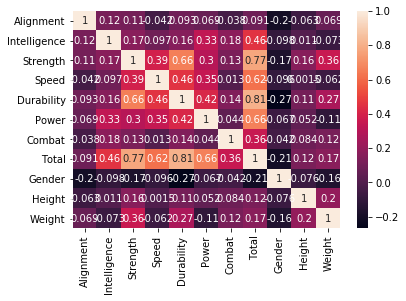

In [323]:
sns.heatmap(Marvel_characters_info_BI_NoID.corr(), annot=True)

In [320]:
def best_in(group,number = 10):
    topX = pd.DataFrame()
    for column in group.columns:
        topX[column] = list(group.sort_values(by = column, ascending = False).Name.head(number))
    top = topX.drop(topX.columns[[0,1,2,-3]], axis=1)
    return top

best_in(Marvel_characters_info_BI)

,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Height,Weight
0,Jean Grey,A-Bomb,Nova,Stardust,Silver Surfer,Ares,Stardust,Fin Fang Foom,Sasquatch
1,Professor X,Beyonder,Stardust,Silver Surfer,Black Bolt,Iron Fist,Galactus,Galactus,Juggernaut
2,Doctor Strange,She-Hulk,Air-Walker,Nova,Jean Grey,Punisher,Dormammu,Groot,Hulk
3,Galactus,Magus,Quicksilver,Nova,Deadpool,Nick Fury,Thor,Wolfsbane,Red Hulk
4,Iron Man,Thanos,Nova,Ghost Rider,Stardust,Sabretooth,Nova,Sasquatch,Bloodaxe
5,Tinkerer,Juggernaut,Black Bolt,Beyonder,Iron Man,Shang-Chi,Nova,Onslaught,Wolfsbane
6,Kang,Thor,Thor,Nova,Cable,Black Panther,Magus,Juggernaut,Thanos
7,Leader,Hulk,Silver Surfer,Onslaught,Magus,Wolverine,Jean Grey,Hulk,A-Bomb
8,Mandarin,Hercules,Aurora,Klaw,Dormammu,Hercules,Onslaught,Colossus,Abomination
9,Captain Marvel,Galactus,Galactus,Deadpool,Mephisto,Captain America,Apocalypse,Cloak,Onslaught


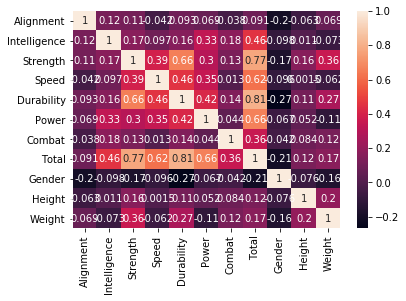

In [321]:
import seaborn as sns
sns.heatmap(Marvel_characters_info_BI_NoID.corr(), annot=True)

In [322]:
def mean_df(df):
    dict_means = {}
    for i in list_of_columns:
        dict_means[i] = df[i].mean()
    return dict_means

means_tot = mean_df(Marvel_DF)

In [155]:
def median_df(df):
    dict_medians = {}
    for i in list_of_columns:
        dict_medians[i] = df[i].median()
    return dict_medians

median_tot = median_df(Marvel_DF)

In [156]:
heroes = Marvel_DF[Marvel_DF.Alignment == 'good']
villains = Marvel_DF[Marvel_DF.Alignment == 'bad']

means_heroes = mean_df(heroes)
median_heroes = median_df(heroes)

means_villains = mean_df(villains)
median_villains = median_df(villains)

In [201]:
""" This function generate a dataframe with the no (spec.) top
heroes or villains (depending on alignment spec.) that score
the highest on the spec. attribut. """

def top_something(df, alignment, attribute, list_lenght):
    top = Marvel_DF[Marvel_DF['Alignment'] == alignment].sort_values(attribute, ascending = False).head(list_lenght) 
    return top

Top_20_Poweful_Heroes = top_something(Marvel_DF, "good", "Power", 20)

In [191]:
""" This function generate a dataframe with the no (spec.) worst
heroes or villains (depending on alignment spec.) that score
the highest on the spec. attribut. """

def bottom_something_test(df, alignment, attribute, list_lenght):
    bottom = Marvel_DF[Marvel_DF['Alignment'] == alignment].sort_values(attribute, ascending = False).head(list_lenght) 
    return bottom

Least_10_Poweful_Heroes = top_something(Marvel_DF, "good", "Power", 10)

In [159]:
# Heroes with intelligence above average / all heroes

#To DO: functom
means_heroes = mean_df(heroes)
means_heroes

smart_heroes = heroes[heroes["Intelligence"] > means_heroes["Intelligence"]] 
len(smart_heroes)

52

In [163]:
# Heroes with intelligence above average / of all characters

smarter_heroes = heroes[heroes["Intelligence"] > means_tot["Intelligence"]] 

len(smarter_heroes)

#Same number. 

52

In [197]:
Marvel_DF_noID = Marvel_DF.drop(columns = ["ID"])
Marvel_DF_noID.corr()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Intelligence,1.000000,0.166095,0.101775,0.160875,0.331037,0.149086,0.446589
Strength,0.166095,1.000000,0.397891,0.659480,0.291588,0.160401,0.776089
Speed,0.101775,0.397891,1.000000,0.456133,0.329396,0.051929,0.617359
Durability,0.160875,0.659480,0.456133,1.000000,0.413390,0.182003,0.814367
Power,0.331037,0.291588,0.329396,0.413390,1.000000,0.066551,0.653712
Combat,0.149086,0.160401,0.051929,0.182003,0.066551,1.000000,0.386687
Total,0.446589,0.776089,0.617359,0.814367,0.653712,0.386687,1.000000


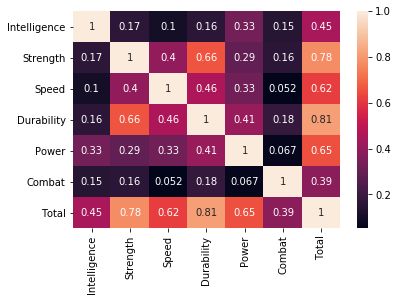

In [198]:
import seaborn as sns

sns.heatmap(Marvel_DF_noID.corr(), annot=True)